In [ ]:


import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/real-life-violence-situations-dataset/real life violence situations/Real Life Violence Dataset/NonViolence/NV_759.mp4
/kaggle/input/real-life-violence-situations-dataset/real life violence situations/Real Life Violence Dataset/NonViolence/NV_564.mp4
/kaggle/input/real-life-violence-situations-dataset/real life violence situations/Real Life Violence Dataset/NonViolence/NV_126.mp4
/kaggle/input/real-life-violence-situations-dataset/real life violence situations/Real Life Violence Dataset/NonViolence/NV_601.mp4
/kaggle/input/real-life-violence-situations-dataset/real life violence situations/Real Life Violence Dataset/NonViolence/NV_397.mp4
/kaggle/input/real-life-violence-situations-dataset/real life violence situations/Real Life Violence Dataset/NonViolence/NV_782.mp4
/kaggle/input/real-life-violence-situations-dataset/real life violence situations/Real Life Violence Dataset/NonViolence/NV_143.mp4
/kaggle/input/real-life-violence-situations-dataset/real life violence situa

In [ ]:
import os
import shutil
import cv2
import math
import random
import numpy as np
import datetime as dt
import tensorflow
import keras
from collections import deque
import matplotlib.pyplot as plt
plt.style.use("seaborn")

%matplotlib inline

from sklearn.model_selection import train_test_split

from keras.layers import *
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

2024-02-25 11:11:03.125224: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-25 11:11:03.125426: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-25 11:11:03.295162: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/tmp/ipykernel_33/141191317.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [ ]:
from IPython.display import HTML
from base64 import b64encode

# To Show a Video in Notebook
def Play_Video(filepath):
    html = ''
    video = open(filepath,'rb').read()
    src = 'data:video/mp4;base64,' + b64encode(video).decode()
    html += '<video width=640 muted controls autoplay loop><source src="%s" type="video/mp4"></video>' % src
    return HTML(html)

In [ ]:
NonViolnceVideos_Dir = "../input/real-life-violence-situations-dataset/Real Life Violence Dataset/NonViolence/"
ViolnceVideos_Dir = "../input/real-life-violence-situations-dataset/Real Life Violence Dataset/Violence/"


NonViolence_files_names_list = os.listdir(NonViolnceVideos_Dir)
Violence_files_names_list = os.listdir(ViolnceVideos_Dir)


Random_NonViolence_Video = random.choice(NonViolence_files_names_list)
Random_Violence_Video = random.choice(Violence_files_names_list)

In [ ]:
Play_Video(f"{NonViolnceVideos_Dir}/{Random_NonViolence_Video}")

In [ ]:
Play_Video(f"{ViolnceVideos_Dir}/{Random_Violence_Video}")


In [ ]:
IMAGE_HEIGHT , IMAGE_WIDTH = 64, 64

SEQUENCE_LENGTH = 16


DATASET_DIR = "../input/real-life-violence-situations-dataset/Real Life Violence Dataset/"

CLASSES_LIST = ["NonViolence","Violence"]

In [ ]:
def frames_extraction(video_path):

    frames_list = []

    video_reader = cv2.VideoCapture(video_path)

    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)

    for frame_counter in range(SEQUENCE_LENGTH):


        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        success, frame = video_reader.read()

        if not success:
            break


        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))

        normalized_frame = resized_frame / 255

        frames_list.append(normalized_frame)


    video_reader.release()

    return frames_list

In [ ]:
def create_dataset():

    features = []
    labels = []
    video_files_paths = []


    for class_index, class_name in enumerate(CLASSES_LIST):

        print(f'Extracting Data of Class: {class_name}')


        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))


        for file_name in files_list:


            video_file_path = os.path.join(DATASET_DIR, class_name, file_name)

            frames = frames_extraction(video_file_path)

            if len(frames) == SEQUENCE_LENGTH:


                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)

    features = np.asarray(features)
    labels = np.array(labels)

    return features, labels, video_files_paths

In [ ]:
features, labels, video_files_paths = create_dataset()

Extracting Data of Class: NonViolence


[h264 @ 0x5cd4d08b4840] mb_type 104 in P slice too large at 98 31
[h264 @ 0x5cd4d08b4840] error while decoding MB 98 31
[h264 @ 0x5cd4d08b4840] mb_type 104 in P slice too large at 98 31
[h264 @ 0x5cd4d08b4840] error while decoding MB 98 31
[h264 @ 0x5cd4d08b4840] mb_type 104 in P slice too large at 98 31
[h264 @ 0x5cd4d08b4840] error while decoding MB 98 31
[h264 @ 0x5cd4d08b4840] mb_type 104 in P slice too large at 98 31
[h264 @ 0x5cd4d08b4840] error while decoding MB 98 31


Extracting Data of Class: Violence


In [ ]:
np.save("features.npy",features)
np.save("labels.npy",labels)
np.save("video_files_paths.npy",video_files_paths)

In [ ]:
features, labels, video_files_paths = np.load("features.npy") , np.load("labels.npy") ,  np.load("video_files_paths.npy")

In [ ]:
one_hot_encoded_labels = to_categorical(labels)

In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.1,
                                                                            shuffle = True, random_state = 42)

In [ ]:
print(features_train.shape,labels_train.shape )
print(features_test.shape, labels_test.shape)

(1800, 16, 64, 64, 3) (1800, 2)
(200, 16, 64, 64, 3) (200, 2)


In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2

mobilenet = MobileNetV2( include_top=False , weights="imagenet")


mobilenet.trainable=True

for layer in mobilenet.layers[:-40]:
  layer.trainable=False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
def create_model():

    model = Sequential()


    model.add(Input(shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))


    model.add(TimeDistributed(mobilenet))

    model.add(Dropout(0.25))

    model.add(TimeDistributed(Flatten()))


    lstm_fw = LSTM(units=32)
    lstm_bw = LSTM(units=32, go_backwards = True)

    model.add(Bidirectional(lstm_fw, backward_layer = lstm_bw))

    model.add(Dropout(0.25))

    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.25))

    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.25))

    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.25))

    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.25))


    model.add(Dense(len(CLASSES_LIST), activation = 'softmax'))

    ########################################################################################################################

    model.summary()

    return model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 16, 2, 2, 1280)    2257984   
 ributed)                                                        
                                                                 
 dropout (Dropout)           (None, 16, 2, 2, 1280)    0         
                                                                 
 time_distributed_1 (TimeDi  (None, 16, 5120)          0         
 stributed)                                                      
                                                                 
 bidirectional (Bidirection  (None, 64)                1319168   
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                      

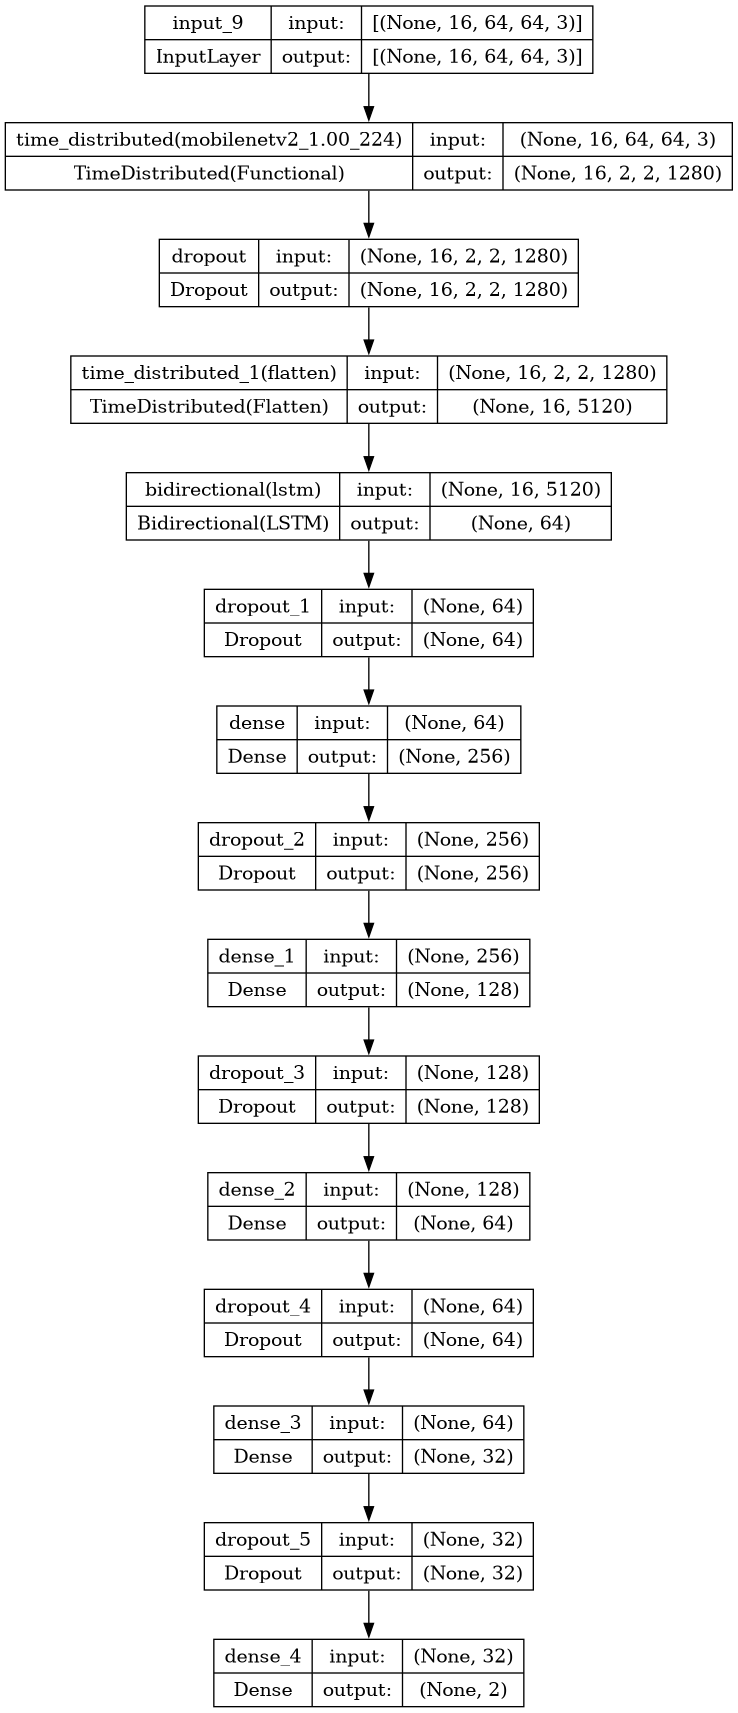

In [ ]:
MoBiLSTM_model = create_model()

plot_model(MoBiLSTM_model, to_file = 'MobBiLSTM_model_structure_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
import tensorflow as tf
from keras.callbacks import EarlyStopping


early_stopping_callback = EarlyStopping(monitor = 'val_accuracy', patience = 10, restore_best_weights = True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                  factor=0.6,
                                                  patience=5,
                                                  min_lr=0.00005,
                                                  verbose=1)


MoBiLSTM_model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ["accuracy"])

MobBiLSTM_model_history = MoBiLSTM_model.fit(x = features_train, y = labels_train, epochs = 50, batch_size = 8 ,
                                             shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback,reduce_lr])

Epoch 1/50
180/180 [==============================] - 122s 619ms/step - loss: 0.6981 - accuracy: 0.5042 - val_loss: 0.6924 - val_accuracy: 0.4889 - lr: 0.0100
Epoch 2/50
180/180 [==============================] - 108s 601ms/step - loss: 0.6847 - accuracy: 0.5479 - val_loss: 0.6488 - val_accuracy: 0.7000 - lr: 0.0100
Epoch 3/50
180/180 [==============================] - 108s 599ms/step - loss: 0.6188 - accuracy: 0.6826 - val_loss: 0.4937 - val_accuracy: 0.7972 - lr: 0.0100
Epoch 4/50
180/180 [==============================] - 108s 601ms/step - loss: 0.5109 - accuracy: 0.7639 - val_loss: 0.4699 - val_accuracy: 0.7639 - lr: 0.0100
Epoch 5/50
180/180 [==============================] - 108s 600ms/step - loss: 0.4192 - accuracy: 0.8222 - val_loss: 0.4944 - val_accuracy: 0.7861 - lr: 0.0100
Epoch 6/50
180/180 [==============================] - 108s 598ms/step - loss: 0.3524 - accuracy: 0.8576 - val_loss: 0.3971 - val_accuracy: 0.8472 - lr: 0.0100
Epoch 7/50
180/180 [==========================

In [ ]:
model_evaluation_history = MoBiLSTM_model.evaluate(features_test, labels_test)

7/7 [==============================] - 9s 902ms/step - loss: 0.2086 - accuracy: 0.9400


In [ ]:
MoBiLSTM_model.save("violance detection model",save_format="h5")

In [ ]:
MoBiLSTM_model.save("Violance_Detection.h5")

In [ ]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):

    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]


    epochs = range(len(metric_value_1))

    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'orange', label = metric_name_2)

    plt.title(str(plot_name))

    plt.legend()

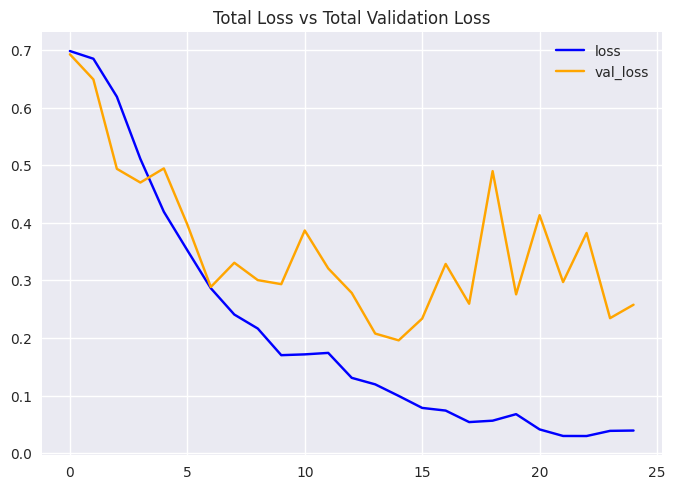

In [ ]:
plot_metric(MobBiLSTM_model_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

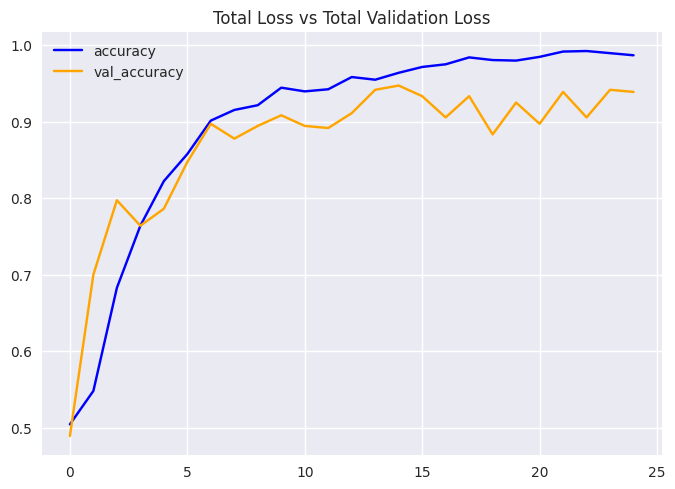

In [ ]:
plot_metric(MobBiLSTM_model_history, 'accuracy', 'val_accuracy', 'Total Loss vs Total Validation Loss')


In [ ]:
labels_predict = MoBiLSTM_model.predict(features_test)
labels_predict = np.argmax(labels_predict, axis=1)
labels_test_normal = np.argmax(labels_test, axis=1)

7/7 [==============================] - 7s 875ms/step


In [ ]:
from sklearn.metrics import accuracy_score
AccScore = accuracy_score(labels_predict, labels_test_normal)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  0.94


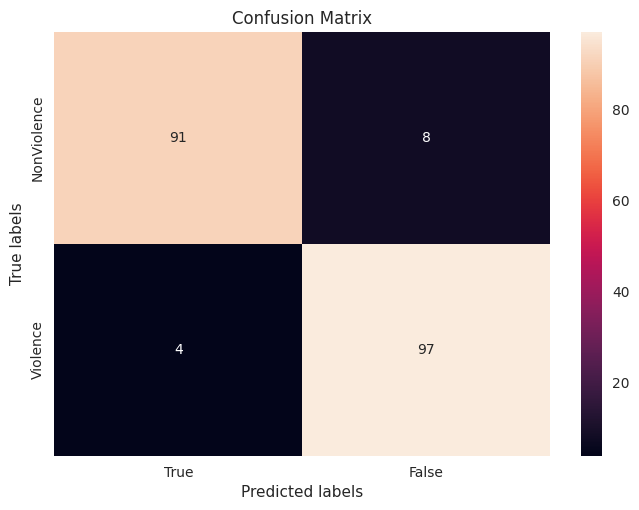

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

ax= plt.subplot()
cm=confusion_matrix(labels_test_normal, labels_predict)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['True', 'False']); ax.yaxis.set_ticklabels(['NonViolence', 'Violence']);

In [ ]:
def predict_video(video_file_path, SEQUENCE_LENGTH):

    video_reader = cv2.VideoCapture(video_file_path)


    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))


    frames_list = []


    predicted_class_name = ''


    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))


    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH),1)


    for frame_counter in range(SEQUENCE_LENGTH):


        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        success, frame = video_reader.read()

        if not success:
            break


        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))


        normalized_frame = resized_frame / 255


        frames_list.append(normalized_frame)


    predicted_labels_probabilities = MoBiLSTM_model.predict(np.expand_dims(frames_list, axis = 0))[0]


    predicted_label = np.argmax(predicted_labels_probabilities)


    predicted_class_name = CLASSES_LIST[predicted_label]


    print(f'Predicted: {predicted_class_name}\nConfidence: {predicted_labels_probabilities[predicted_label]}')

    video_reader.release()

In [ ]:

input_video_file_path = "../input/real-life-violence-situations-dataset/Real Life Violence Dataset/Violence/V_276.mp4"


predict_video(input_video_file_path, SEQUENCE_LENGTH)


Play_Video(input_video_file_path)

1/1 [==============================] - 0s 62ms/step
Predicted: Violence
Confidence: 0.999953031539917
